# Paleontology Machine Learning Project


---

## Explanation 

This project is based on a data base found on https://data.world/bryon/paleobiodb. It is called Paleobilogy Database and is a public database of paleontological data.
This database contains the list of fossiles found on earth with their found locations,descriptions, genuses etc.. 


**What are the main objectives of this project?** 
- study the data attributes to estimate which factors are most important when determining the identity of a given fossil sample.
- test multiple machine learning algorithm to predict the genus of a fossile according to its features.
- compare efficiency/accuracy of those algorithms to understand which algorithm is best fitted for this type of machine learning problem.

---


## Glossary <a id='glossary'></a>
 0) [Processing data](#processing_data)
 1) [KNN in 2D](#knn2D)
 2) [KNN in 3D](#knn3d)
 3) [Logistic regression](#logistic_regression)
 4) [Decision tree](#decision_tree)
 5) [PCA for higher dimensions](#pca)

(you can click on the links to jump directly to each subpart)

---

#### Import libraries

In [60]:
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn.metrics as metrics
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

#Import stuff for k-nearest neighbor 
import sklearn.neighbors
import sklearn.linear_model
from sklearn.utils import shuffle
from scipy.spatial import Voronoi, voronoi_plot_2d
from matplotlib.colors import ListedColormap
from sklearn.metrics import accuracy_score
#from mpl_toolkits.basemap import Basemap


#import google.colab
#from google.colab import files
#uploaded = files.upload()

---

## 0) Processing data <a id='processing_data'> </a>

In [61]:
data = pd.read_csv('thegigafile.csv')

In [62]:
#Vizualising data 
data

max_ma  min_ma           genus        lng        lat  paleolng  \
0        353.8   345.3  Australosutura -98.099998  31.000000    -65.59   
1        353.8   345.3  Carbonocoryphe -98.099998  31.000000    -65.59   
2        353.8   345.3    Thigriffides -98.099998  31.000000    -65.59   
3        353.8   345.3     Pudoproetus -98.099998  31.000000    -65.59   
4        353.8   345.3     Pudoproetus -98.099998  31.000000    -65.59   
...        ...     ...             ...        ...        ...       ...   
743654    99.6    93.5       Lepicerus  96.720001  26.360001    105.50   
743655   468.1   460.9    Eremotoechia -86.784721  33.311111   -114.63   
743656   467.3   458.4    Eremotoechia -84.129166  35.741669   -112.38   
743657   467.3   458.4    Eremotoechia -84.125000  35.750000   -112.37   
743658   468.1   460.9       Pionomena -77.816666  39.599998   -104.99   

        paleolat   lithology1             composition  
0         -27.46  "carbonate"  low Mg calcite, chitin  
1         -27.46  "carbonate"  low Mg calcite, chitin  
2         -27.46  "carbonate"  low Mg calcite, chitin  
3         -27.46  "carbonate"  low Mg calcite, chitin  
4         -27.46  "carbonate"  low Mg calcite, chitin  
...          ...          ...                     ...  
743654      8.29        amber                  chitin  
743655     -8.13  "limestone"          low Mg calcite  
743656    -10.30  "limestone"          low Mg calcite  
743657    -10.29  "limestone"          low Mg calcite  
743658     -8.77  "limestone"          low Mg calcite  

[743659 rows x 9 columns]

In [63]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 743659 entries, 0 to 743658
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   max_ma       743659 non-null  float64
 1   min_ma       743659 non-null  float64
 2   genus        743659 non-null  object 
 3   lng          743659 non-null  float64
 4   lat          743659 non-null  float64
 5   paleolng     743659 non-null  float64
 6   paleolat     743659 non-null  float64
 7   lithology1   743659 non-null  object 
 8   composition  743659 non-null  object 
dtypes: float64(6), object(3)
memory usage: 51.1+ MB


---
## 1) K-nearest neighbor (Space/Genus) <a id='knn2D'></a>


The first model we will implement will be a kNN model in 2 dimensions: longitude and lattitude. Then we will try using paleolongitude and paleolattitude to compare.

#### [Jump back to glossary](#glossary)

### a) Data sampling

In [64]:
#Test here on only three data frame
new_table = data[['lng', 'lat', 'genus']].copy()

In [65]:
new_table

lng        lat           genus
0      -98.099998  31.000000  Australosutura
1      -98.099998  31.000000  Carbonocoryphe
2      -98.099998  31.000000    Thigriffides
3      -98.099998  31.000000     Pudoproetus
4      -98.099998  31.000000     Pudoproetus
...           ...        ...             ...
743654  96.720001  26.360001       Lepicerus
743655 -86.784721  33.311111    Eremotoechia
743656 -84.129166  35.741669    Eremotoechia
743657 -84.125000  35.750000    Eremotoechia
743658 -77.816666  39.599998       Pionomena

[743659 rows x 3 columns]

### b) Using k-nearest neighbor with 3 genuses 

#### i) Look at the most occurences of genuses 

In [66]:
genus_counts = new_table['genus'].value_counts().reset_index()
genus_counts.columns = ['genus', 'count']
genus_counts = genus_counts.sort_values(by='count', ascending=False)

# Print the ranking
print("Ranking of genera with the most occurrences:")
for index, row in genus_counts.iterrows():
    print(f"{index+1}. {row['genus']}: {row['count']} occurrences")

Ranking of genera with the most occurrences:
1. Ostrea: 1828 occurrences
2. Composita: 1722 occurrences
3. Chlamys: 1531 occurrences
4. Inoceramus: 1368 occurrences
5. Derbyia: 1330 occurrences
6. Panderodus: 1316 occurrences
7. Nuculana: 1256 occurrences
8. Polygnathus: 1184 occurrences
9. Cleiothyridina: 1172 occurrences
10. Modiolus: 1120 occurrences
11. Favosites: 1092 occurrences
12. Atrypa: 1092 occurrences
13. Ozarkodina: 1081 occurrences
14. Dentalium: 1080 occurrences
15. Anomia: 1076 occurrences
16. Hustedia: 1075 occurrences
17. Glycymeris: 1052 occurrences
18. Bairdia: 1021 occurrences
19. Lingula: 1008 occurrences
20. Isotelus: 1001 occurrences
21. Linoproductus: 995 occurrences
22. Astarte: 957 occurrences
23. Plagiostoma: 941 occurrences
24. Porites: 923 occurrences
25. Neospirifer: 869 occurrences
26. Camptonectes: 852 occurrences
27. Palaeoneilo: 847 occurrences
28. Corbula: 846 occurrences
29. Euspira: 838 occurrences
30. Nucula: 837 occurrences
31. Platystrophia: 830

4578. Ochotona: 34 occurrences
4571. Loupanus: 34 occurrences
4566. Atactoporella: 34 occurrences
4567. Dermomurex (Dermomurex): 34 occurrences
4568. Tiborella: 34 occurrences
4569. Dacromya: 34 occurrences
4570. Naomichelys: 34 occurrences
4565. Korobkovia: 34 occurrences
4572. Metopolichas: 34 occurrences
4574. Agladrillia (Eumetadrillia): 34 occurrences
4575. Lyopora: 34 occurrences
4576. Pterotrigonia (Pterotrigonia): 34 occurrences
4577. Argilloecia: 34 occurrences
4573. Amphechinus: 34 occurrences
4759. Aristoceras: 33 occurrences
4753. Glyphostoma (Glyphostoma): 33 occurrences
4754. Macropotamorhynchus: 33 occurrences
4755. Gyrostrea: 33 occurrences
4756. Chlorostoma: 33 occurrences
4757. Alopias: 33 occurrences
4758. Substeueroceras: 33 occurrences
4762. Plectomya: 33 occurrences
4760. Phacelostylophyllum: 33 occurrences
4761. Pyrina: 33 occurrences
4763. Bernissartia: 33 occurrences
4764. Sorgenfreispira: 33 occurrences
4765. Arachnopusia: 33 occurrences
4751. Spathochlamys: 3

8536. Oculospongia: 16 occurrences
8535. Lonchocephalus: 16 occurrences
8534. Coelocyclus: 16 occurrences
8533. Aptyxiella: 16 occurrences
8532. Eomysmena: 16 occurrences
8531. Carinagypa: 16 occurrences
8530. Gorgopsina: 16 occurrences
8529. Henricosbornia: 16 occurrences
8552. Odontocephalus: 16 occurrences
8553. Clavus: 16 occurrences
8554. Phoenixites: 16 occurrences
8567. Torvosaurus: 16 occurrences
8577. Polygireulima: 16 occurrences
8576. Prunocarpus: 16 occurrences
8575. Parabolinites: 16 occurrences
8574. Tetrapaurinella: 16 occurrences
8573. Cyathocrinus: 16 occurrences
8572. Parectypodus: 16 occurrences
8571. Tumicephalus: 16 occurrences
8570. Metastenodiscus: 16 occurrences
8569. Cimoliasaurus: 16 occurrences
8568. Ceratotrochus (Edwardsotrochus): 16 occurrences
8566. Rasenia (Rasenia): 16 occurrences
8555. Stenophragmidium: 16 occurrences
8565. Agassizocrinus: 16 occurrences
8564. Crassatella (Pachythaerus): 16 occurrences
8563. Lysis: 16 occurrences
8562. Astandes: 16 occ

13172. Blagraveia: 9 occurrences
13173. Linonema: 9 occurrences
13174. Zygodiscus: 9 occurrences
13175. Discotectus: 9 occurrences
13176. Platycrossos: 9 occurrences
13177. Trigonictis: 9 occurrences
13178. Protolamna: 9 occurrences
13179. Titanosarcolites: 9 occurrences
13180. Panamicorbula: 9 occurrences
13181. Pseudostictoporella: 9 occurrences
13182. Myctophum: 9 occurrences
13183. Ornithomimipus: 9 occurrences
13184. Neophoca: 9 occurrences
13185. Callicylix (Cyclostigma): 9 occurrences
13186. Ediacaria: 9 occurrences
13187. Zhonglupuceras: 9 occurrences
13188. Morrisipecten: 9 occurrences
13163. Fulgoraria: 9 occurrences
13162. Ogorella: 9 occurrences
13161. Eoviscaccia: 9 occurrences
13147. Taeniothrips: 9 occurrences
13136. Mesoleuctra: 9 occurrences
13137. Fasciculiconcha: 9 occurrences
13138. Richardsonella: 9 occurrences
13139. Stephenaspis: 9 occurrences
13140. Stenurothrips: 9 occurrences
13141. Eobaatar: 9 occurrences
13142. Chatterjeea: 9 occurrences
13143. Lagorchestes:

16525. Mirilentia: 6 occurrences
16524. Cavernolites: 6 occurrences
16523. Nuthetes: 6 occurrences
16522. Dimyloides: 6 occurrences
16521. Buchiceras: 6 occurrences
16520. Tridenticeras: 6 occurrences
16519. Subtaeniothaerus: 6 occurrences
16518. Edentosuchus: 6 occurrences
16517. Exfenestella: 6 occurrences
16516. Menoeidina: 6 occurrences
16515. Agarhyncha: 6 occurrences
16514. Acrograptus: 6 occurrences
16513. Nephelophyllum: 6 occurrences
16512. Pseudotimania: 6 occurrences
16511. Prionochelys: 6 occurrences
16510. Remingtonocetus: 6 occurrences
16509. Scarrittia: 6 occurrences
16508. Kionophyllum: 6 occurrences
16507. Barrandeolites: 6 occurrences
16506. Arctosirenites: 6 occurrences
16529. Evazoum: 6 occurrences
16531. Ignoproetus: 6 occurrences
16557. Ceramaster: 6 occurrences
16532. Sowburia: 6 occurrences
16555. Subinyoites: 6 occurrences
16554. Ophiopholis: 6 occurrences
16553. Jianchuania: 6 occurrences
16552. Lasiocrinus: 6 occurrences
16551. Pseudavicula: 6 occurrences
165

24977. Mesotrichopteridium: 3 occurrences
24978. Dubiosynotaxus: 3 occurrences
24979. Gruntelasma: 3 occurrences
24981. Krebsia: 3 occurrences
24982. Globulocystites: 3 occurrences
24983. Cheirocystis: 3 occurrences
24984. Epicelia: 3 occurrences
24985. Mysops: 3 occurrences
24986. Sastriella: 3 occurrences
24987. Menneus: 3 occurrences
24988. Abia: 3 occurrences
24989. Kurrabi: 3 occurrences
24990. Tillyardiopsis: 3 occurrences
24991. Primorilestes: 3 occurrences
24992. Allacma: 3 occurrences
24993. Echinoconchella: 3 occurrences
24994. Cerapterites: 3 occurrences
24995. Minicrinus: 3 occurrences
24996. Lepidotrix: 3 occurrences
24997. Gerontothrips: 3 occurrences
24998. Murina: 3 occurrences
24999. Mesokristensenia: 3 occurrences
25000. Tanysphyra: 3 occurrences
25003. Helicodonta: 3 occurrences
24883. Bodenia: 3 occurrences
25001. Semiplanus: 3 occurrences
25002. Dekalymene: 3 occurrences
24976. Pseudoacrometa: 3 occurrences
24974. Pseudopetalodontia: 3 occurrences
24945. Undiferina

30415. Lovenicystis: 2 occurrences
30439. Lamprotula: 2 occurrences
30438. Polenovula: 2 occurrences
30437. Hesperocystis: 2 occurrences
30436. Australophis: 2 occurrences
30435. Echinoprimitia: 2 occurrences
30434. Kailiceras: 2 occurrences
30433. Mareastraea: 2 occurrences
30432. Cundaria: 2 occurrences
30431. Cyclorangeroceras: 2 occurrences
30430. Bodoceras: 2 occurrences
30429. Dwightoceras: 2 occurrences
30428. Palaeopachygnatha: 2 occurrences
30427. Belophos: 2 occurrences
30426. Liratomina: 2 occurrences
30425. Donispirifer: 2 occurrences
30424. Myrmecoboides: 2 occurrences
30423. Semitrivia: 2 occurrences
30422. Gannibeyrichia: 2 occurrences
30421. Balticella: 2 occurrences
30420. Acanthobolbina: 2 occurrences
30419. Centriproetus: 2 occurrences
30418. Thylacaelurus: 2 occurrences
30417. Cystocladia: 2 occurrences
30440. Blikanasaurus: 2 occurrences
30441. Cyphonella: 2 occurrences
30442. Triumphis: 2 occurrences
30455. Praecursoricrinus: 2 occurrences
30465. Amaraphyllum: 2 o

28519. Isorophusella: 2 occurrences
28518. Ammopalmula: 2 occurrences
28517. Molzaxis: 2 occurrences
28516. Ussuriaspenites: 2 occurrences
28515. Palaeosemantis: 2 occurrences
28514. Lepicerus: 2 occurrences
28513. Dolicavia: 2 occurrences
28512. Auliscomys: 2 occurrences
28511. Mylagaulodon: 2 occurrences
28534. Orthrius: 2 occurrences
28536. Gorytes: 2 occurrences
28509. Eulomina: 2 occurrences
28537. Taitzehoia: 2 occurrences
28557. Argyrolagus: 2 occurrences
28556. Holozaedyus: 2 occurrences
28555. Leptoconocardium: 2 occurrences
28558. Apticoccus: 2 occurrences
28559. Tettigoniella: 2 occurrences
28461. Bulbaspis: 2 occurrences
28560. Teleocydnus: 2 occurrences
28554. Semiotus: 2 occurrences
28553. Philagra: 2 occurrences
28552. Calcitro: 2 occurrences
28551. Polybothris: 2 occurrences
28550. Shantungia: 2 occurrences
28549. Pterostichus (Pseudomaseus): 2 occurrences
28548. Lepidobatrachus: 2 occurrences
28547. Perlucipecta: 2 occurrences
28546. Cretorthezia: 2 occurrences
28545. 

49941. Serradonta: 1 occurrences
49940. Larrazetia: 1 occurrences
49939. Miocitta: 1 occurrences
49938. Tirocrinus: 1 occurrences
49937. Borisrohdendorfia: 1 occurrences
49936. Hyalistata: 1 occurrences
49951. Kondomoprosbole: 1 occurrences
49953. Aenigmatidia: 1 occurrences
49971. Balticobaetisca: 1 occurrences
49954. Korora: 1 occurrences
49969. Mesonetopsis: 1 occurrences
49968. Jurassonurus: 1 occurrences
49967. Hagenulites: 1 occurrences
49966. Fuyous: 1 occurrences
49965. Shantous: 1 occurrences
49964. Pseudokageronia: 1 occurrences
49963. Siphlurites: 1 occurrences
49962. Mesoforficula: 1 occurrences
49961. Turfanerella: 1 occurrences
49960. Turbocrinus: 1 occurrences
49959. Umerata: 1 occurrences
49958. Breviatractites: 1 occurrences
49957. Oligocixia: 1 occurrences
49956. Ibanocrinus: 1 occurrences
49955. Cytocupes: 1 occurrences
49935. Mindazerius: 1 occurrences
49934. Dominicaphis: 1 occurrences
49933. Kyreocrinus: 1 occurrences
49932. Protoxenos: 1 occurrences
49913. Rammea

36133. Brachytrachelopan: 1 occurrences
36132. Tschirnhausia: 1 occurrences
36131. Epigonopsallops: 1 occurrences
36130. Tytthophysa: 1 occurrences
36129. Eoevania: 1 occurrences
36128. Eotrichomyia: 1 occurrences
36127. Eoplicanoplia: 1 occurrences
36126. Electrohemiphlebia: 1 occurrences
36125. Calicovatellus: 1 occurrences
36105. Furcicupes: 1 occurrences
36104. Protohadros: 1 occurrences
36103. Melovoliopus: 1 occurrences
36102. Phyllovoliopus: 1 occurrences
36083. Glabrimycetoporus: 1 occurrences
36082. Discosauriscus: 1 occurrences
36081. Codoserphus: 1 occurrences
36080. Odontomma: 1 occurrences
36079. Liaonemobius: 1 occurrences
36078. Huaxiasciophilites: 1 occurrences
36077. Pochazoides: 1 occurrences
36076. Eozostrodon: 1 occurrences
36075. Ceratodacus: 1 occurrences
36074. Problepharoneura: 1 occurrences
36073. Permotitan: 1 occurrences
36072. Euhagla: 1 occurrences
36071. Paramaraga: 1 occurrences
36070. Cantohagla: 1 occurrences
36069. Sharovohagla: 1 occurrences
36084. Tr

40911. Leptotrypella (Leptotrypella): 1 occurrences
40891. Chilcacetus: 1 occurrences
40889. Guizhouia: 1 occurrences
40854. Crownopora: 1 occurrences
40888. Reraspis: 1 occurrences
40869. Atrina (Atrina): 1 occurrences
40868. Mezorulganites: 1 occurrences
40867. Collbatothuria: 1 occurrences
40866. Monilipsolus: 1 occurrences
40865. Dianous: 1 occurrences
40864. Ischnosoma: 1 occurrences
40863. Pardalosus: 1 occurrences
40862. Cleptelmis: 1 occurrences
40861. Lapsus: 1 occurrences
40860. Atrecus: 1 occurrences
40859. Duerochelys: 1 occurrences
40858. Balakhonia: 1 occurrences
40857. Phyllotreta: 1 occurrences
40856. Cryphalus: 1 occurrences
40855. Protothyraster: 1 occurrences
40870. Crawfordina: 1 occurrences
40871. Progabbia: 1 occurrences
40872. Austrotrophon: 1 occurrences
40881. Yezoterpnosia: 1 occurrences
40887. Rhinechis: 1 occurrences
40886. Pritykiniella: 1 occurrences
40885. Drazinderetes: 1 occurrences
40884. Enaliochelys: 1 occurrences
40883. Wathondara: 1 occurrences
408

#### ii) create kNN classification on a small data subset 

In [67]:
filtered_table = new_table[new_table['genus'].isin(['Eremotoechia', 'Pudoproetus', 'Carbonocoryphe'])]
filtered_table = filtered_table.sample(frac=1).reset_index(drop=True)
len(filtered_table)

38

In [68]:
#plotting function 
def plot_scatter(color_map, data_set, x_column, y_column, group_column):
    plt.figure(figsize=(10, 6))
    for group, group_data in data_set.groupby(group_column):
        plt.scatter(group_data[x_column], group_data[y_column], label=group, color=color_map.get(group, 'black'))
    
    plt.xlabel(x_column.capitalize())
    plt.ylabel(y_column.capitalize())
    plt.title(f'Scatter Plot of {x_column.capitalize()} vs {y_column.capitalize()}')
    plt.legend()
    plt.show()

In [69]:
#knn -classification function 
def knn_classification(data, features, target, test_size=0.2, n_neighbors=5):
    # Split the data into features (X) and target (y)
    X = data[features]
    y = data[target]
    
    # Split the data into training and testing sets
    x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42)
    
    # Initialize the KNN classifier
    model = KNeighborsClassifier(n_neighbors=n_neighbors)
    
    # Train the model
    model.fit(x_train, y_train)
    
    # Make predictions on the test set
    y_pred = model.predict(x_test)
    
    # Calculate the accuracy of the model
    accuracy = accuracy_score(y_test, y_pred)
    
    return accuracy


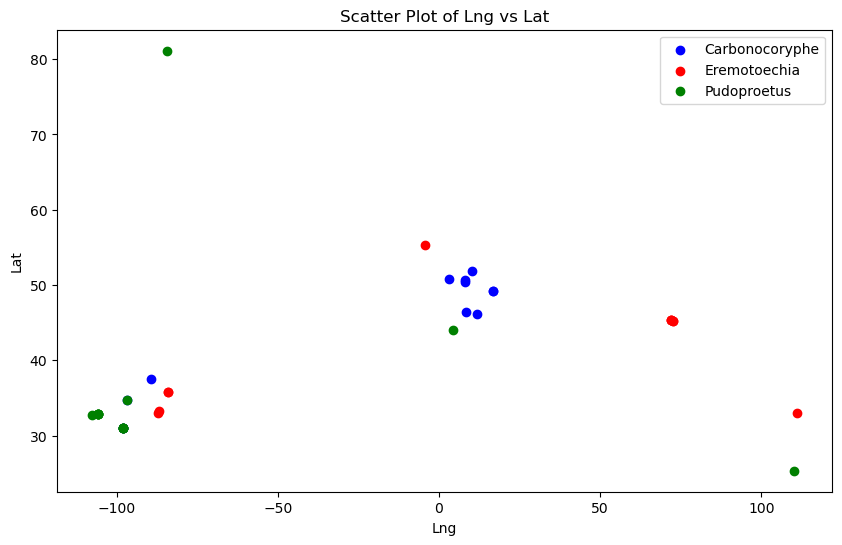

In [70]:
color_map = {
    'Carbonocoryphe': 'blue',
    'Pudoproetus': 'green',
    'Eremotoechia': 'red'
}
plot_scatter(color_map, filtered_table, 'lng', 'lat', 'genus')


##### Decision boundary for k = 3 

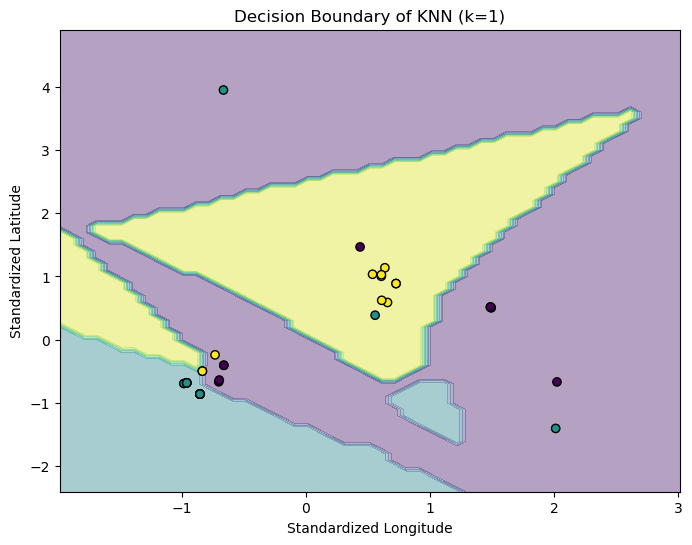

In [71]:
X = filtered_table[['lng', 'lat']]
y = filtered_table['genus']

y = filtered_table['genus'].replace({'Carbonocoryphe': 2,'Pudoproetus': 1, 'Eremotoechia': 0})
# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Initialize and train the k-nearest neighbors classifier
model = KNeighborsClassifier(n_neighbors=3)
model.fit(X_scaled, y)


# Plot the decision boundary
h = 0.1  # step size in the mesh
x_min, x_max = X_scaled[:, 0].min() - 1, X_scaled[:, 0].max() + 1
y_min, y_max = X_scaled[:, 1].min() - 1, X_scaled[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, alpha=0.4)
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y, cmap='viridis', edgecolors='k')
plt.xlabel('Standardized Longitude')
plt.ylabel('Standardized Latitude')
plt.title('Decision Boundary of KNN (k=1)')
plt.show()

In [72]:
accuracy = knn_classification(filtered_table, ['lng', 'lat'], 'genus', test_size=0.2, n_neighbors=2)


print("Accuracy:", accuracy)

Accuracy: 0.625


#### iii) kNN classification on bigger data

In [73]:
filtered_table2 = new_table[new_table['genus'].isin(['Ostrea', 'Composita', 'Chlamys'])]

In [74]:
filtered_table2= filtered_table2.sample(frac=1).reset_index(drop=True)# --> shuffle the rows 
filtered_table2

lng        lat      genus
0     -90.184723  32.298889    Chlamys
1    -103.064499  30.391500  Composita
2     -70.283333 -28.950001    Chlamys
3     -78.638885  35.771942     Ostrea
4     112.216667  27.733334  Composita
...          ...        ...        ...
5076    8.000000  47.000000    Chlamys
5077  -98.651665  33.025276  Composita
5078  -80.013054  33.196110     Ostrea
5079    6.618333  46.044998    Chlamys
5080 -120.099998  35.883331     Ostrea

[5081 rows x 3 columns]

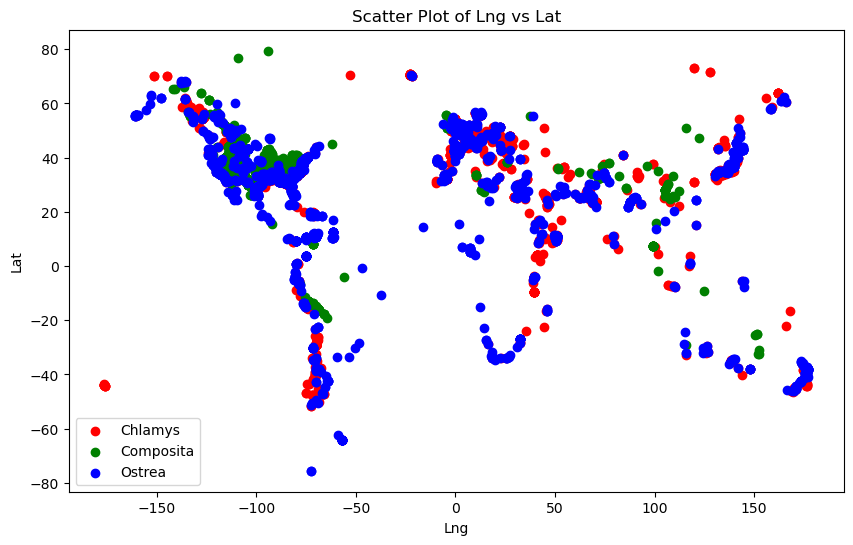

In [75]:
color_map = {
    'Ostrea': 'blue',
    'Composita': 'green',
    'Chlamys': 'red'
}

# Create a scatter plot
plot_scatter(color_map, filtered_table2, 'lng', 'lat', 'genus')


#### iv) Drawing the decision boundary for k =3 

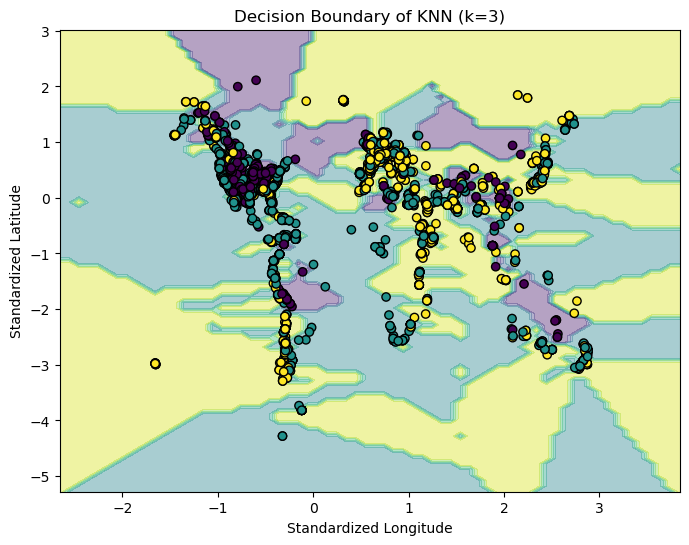

In [76]:
X = filtered_table2[['lng', 'lat']]
y = filtered_table2['genus']

y = filtered_table2['genus'].replace({'Chlamys': 2,'Ostrea': 1, 'Composita': 0})
# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Initialize and train the k-nearest neighbors classifier
model = KNeighborsClassifier(n_neighbors=3)
model.fit(X_scaled, y)


# Plot the decision boundary
h = 0.1  # step size in the mesh
x_min, x_max = X_scaled[:, 0].min() - 1, X_scaled[:, 0].max() + 1
y_min, y_max = X_scaled[:, 1].min() - 1, X_scaled[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, alpha=0.4)
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y, cmap='viridis', edgecolors='k')
plt.xlabel('Standardized Longitude')
plt.ylabel('Standardized Latitude')
plt.title('Decision Boundary of KNN (k=3)')
plt.show()

In [77]:
accuracy = knn_classification(filtered_table2, ['lng', 'lat'], 'genus', test_size=0.2, n_neighbors=2)


print("Accuracy:", accuracy)

Accuracy: 0.8092428711897739


Very good accuracy at around 80% 

However, there are **major problems**  to such approach : 

- we taking the longitude and latitude of species that may have lived millions years away but maybe at the same place --> time has to be taken into account 

- longitude and latitude in 2D is prone to many errors (example : fossile in Alaska and in Kamchatka are close but in terms of longitude and latitude there are in opposite places)

### c) Expanding kNN to 10 genera 

In [78]:
filtered_table3 = new_table[new_table['genus'].isin(['Ostrea', 'Composita', 'Chlamys','Inoceramus','Derbyia',"Panderodus","Nuculana","Polygnathus","Cleiothyridina","Modiolus"])]
filtered_table3 = filtered_table3.sample(frac=1).reset_index(drop=True) #randomizing 

In [79]:
accuracy3 = knn_classification(filtered_table3, ['lng', 'lat'], 'genus', test_size=0.2, n_neighbors=7)
print("Accuracy:", accuracy3)

Accuracy: 0.60412147505423


Testing with different values of n_neighbors, we find that the accuracy for testing with 10 genera is caped at 60%

### Paleolongitude kNN 

#### a) knn with 3 genera 

In [80]:
paleotable = data[['paleolng', 'paleolat', 'genus']].copy()

In [81]:
filtered_paleotable = paleotable[paleotable['genus'].isin(['Ostrea', 'Composita', 'Chlamys'])]
filtered_paleotable = filtered_paleotable.sample(frac=1).reset_index(drop=True)

In [82]:
accuracy = knn_classification(filtered_paleotable, ['paleolng', 'paleolat'], 'genus', test_size=0.2, n_neighbors=3)
accuracy

0.8495575221238938

#### b) knn with 10 genera 

In [83]:
filtered_paleotable2 = paleotable[paleotable['genus'].isin(['Ostrea', 'Composita', 'Chlamys','Inoceramus','Derbyia',"Panderodus","Nuculana","Polygnathus","Cleiothyridina","Modiolus"])]
filtered_paleotable2 = filtered_paleotable2.sample(frac=1).reset_index(drop=True)
accuracy4 = knn_classification(filtered_paleotable2, ['paleolng', 'paleolat'], 'genus', test_size=0.2, n_neighbors=9)
accuracy4

0.5798987707881417

 Once again even when using paleocoordinate when extending genera to more than 3, the accuracy gets quickly caped at 60. Hence another solution has to be provided. The solution might be to do kNN on 3D ? 

---
## 2) k nearest neighbor 3D (Space/ Time/ genuses) <a id='knn3d'></a>

#### [Jump back to glossary](#glossary)

### a) Preprocessing

In this section, we will work on 3D KNN to predict the 10 most common genuses. The first step will be to determine a metric and find a way to renormalize the distances so that KNN doesn't arbitrarily perceive some variables as more important than others.

In [84]:
#defining a new metric for 3D knn using haversine distance and difference in time
from sklearn.metrics.pairwise import haversine_distances
def timespace_metric(X: np.array ,Y: np.array):
    place1=X[:2]
    place2=Y[:2]
    space= haversine_distances([place1],[place2])/np.pi
    time=np.abs(X[-1]-Y[-1])/587.99415
    return (space+time)[0][0]

In [85]:
# checking for the max time difference to renormalize
matrix=data.values
mat=(matrix[:, 0]+matrix[:, 1])/2
M=max(mat)
m=min(mat)
M-m

587.99415

In [86]:
#looks good
timespace_metric(np.array([0,0,0]),np.array([np.pi,0,0]))

1.0

Now that we have a working metric, we will create our data from the large dataset. We decided to only choose 10 genuses to experiment with this, since we were not sure this would generalize well to a large number of genuses. We added a time variable compared to the previous model, we decided to simply average the minimum and the maximum dating of the fossil since this would serve as a good simple data point. We then shuffle the rows to not have any arbitrary bias when choosing the test data set.

In [87]:
#creating the right subdataframe
data3d=data.copy
data3d=data[['lng', 'lat', 'genus']].copy()
data3d['time']=(data['max_ma']+data['min_ma'])/2
data3d = data3d[data3d['genus'].isin(['Ostrea', 'Composita', 'Chlamys','Inoceramus','Derbyia',"Panderodus","Nuculana","Polygnathus","Cleiothyridina","Modiolus"])]
data3d = data3d.sample(frac=1).reset_index(drop=True) # randomize the rows so that there is no bias in the order of the rows
data3d

lng        lat           genus     time
0      -37.149723 -10.855556      Inoceramus   91.400
1       23.481388  50.623333     Polygnathus  385.200
2     -116.252502  39.836388     Polygnathus  390.500
3       48.446667  14.316667        Modiolus  164.800
4       14.115278  49.886944      Panderodus  426.500
...           ...        ...             ...      ...
13822   76.133331  39.966667  Cleiothyridina  275.800
13823  -93.708611  31.403055        Nuculana   51.900
13824  142.755829  47.446945          Ostrea   63.850
13825    9.861111  44.847221        Modiolus    3.094
13826 -136.151993  65.880997         Derbyia  292.800

[13827 rows x 4 columns]

Now we create the model as a callable function so we can experiment with certain variables like number of neighbors, importance of time with respect to space, and vary the test_size as well.

In [88]:
def train3dknn(timespaceratio,neighbors=5,test_size=100,shuffle=False,features=['lng', 'lat','time'],data=data3d):
    #timespaceratio is time_importance/space_importance
    def timespace_metric_in(X: np.array ,Y: np.array):
        place1=X[:2]
        place2=Y[:2]
        space= haversine_distances([place1],[place2])/np.pi
        time=np.abs(X[-1]-Y[-1])/587.99415
        return (space+timespaceratio*time)[0][0]
    
    total_rows=len(data)
    # Select the indices for training and testing sets
    train_indices_3D = list(range(total_rows - test_size))  # Use all rows except the last 10 for training
    test_indices_3D = list(range(total_rows - test_size, total_rows))  # Use the last 10 rows for testing

    data3dknn=data.copy()
    if shuffle:
        data3dknn = data3dknn.sample(frac=1).reset_index(drop=True)
    
    # Split the DataFrame into training and testing sets
    x_train_3D = data3dknn.iloc[train_indices_3D][features]  # Assuming 'lng' and 'lat' are the features
    y_train_3D = data3dknn.iloc[train_indices_3D]['genus']
    x_test_3D = data3dknn.iloc[test_indices_3D][features]
    y_test_3D = data3dknn.iloc[test_indices_3D]['genus']
    
    
    #try to use k-nearest neighbor on simple data 
    model3d = sklearn.neighbors.KNeighborsClassifier(n_neighbors=neighbors,metric=timespace_metric_in)
    model3d.fit(X=x_train_3D, y=y_train_3D)
    
    # Make predictions on the test set
    y_pred_3D = model3d.predict(x_test_3D)
    
    accuracy3D = accuracy_score(y_test_3D, y_pred_3D)
    return accuracy3D

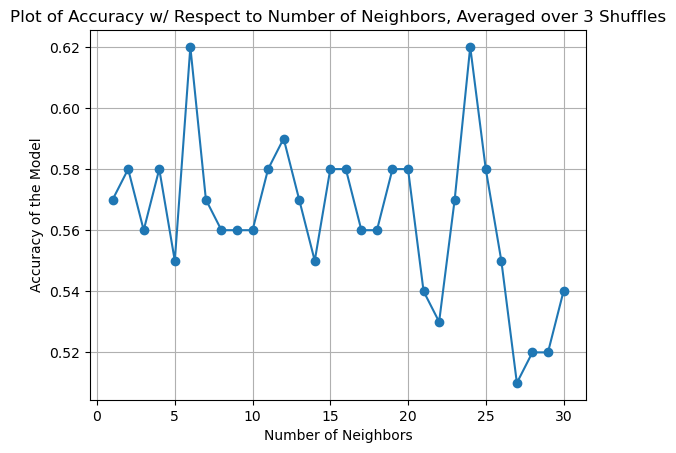

In [89]:
#reshu=[np.average([train3dknn(1,neighbors=i,shuffle=True) for j in range(3)]) for i in range(1,31)]
#reshu (result was rounded)


shuffled_acc_per_neigh= [0.57, 0.58, 0.56, 0.58, 0.55, 0.62, 0.57, 0.56, 0.56, 0.56,
                         0.58, 0.59, 0.57, 0.55, 0.58, 0.58, 0.56, 0.56, 0.58, 0.58,
                         0.54, 0.53, 0.57, 0.62, 0.58, 0.55, 0.51, 0.52, 0.52, 0.54]

# Plotting
plt.plot(np.arange(1,31), shuffled_acc_per_neigh, marker='o')
plt.title('Plot of Accuracy w/ Respect to Number of Neighbors, Averaged over 3 Shuffles')
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy of the Model')
plt.grid(True)
plt.show()


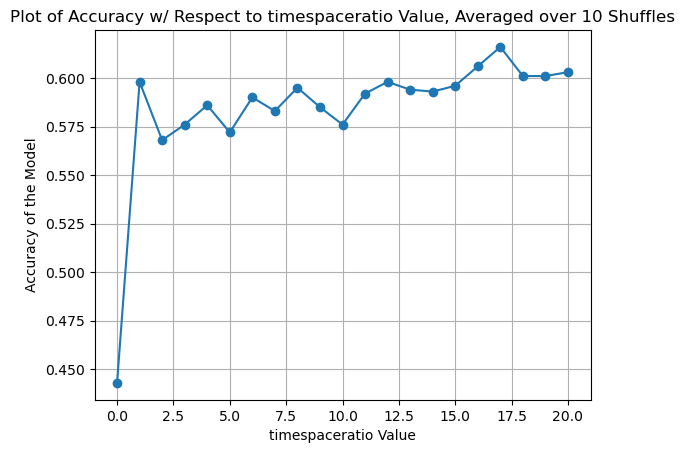

In [90]:
#[np.average([train3dknn(i,neighbors=6,shuffle=True) for j in range(10)]) for i in range(11)]=[0.445, 0.59 , 0.587, 0.621, 0.582, 0.6  , 0.565, 0.592, 0.575,0.588, 0.605]

shuffled_acc_per_timespace=[0.443, 0.598, 0.568, 0.576, 0.586, 0.572, 0.59 , 0.583, 0.595,
       0.585, 0.576, 0.592, 0.598, 0.594, 0.593, 0.596, 0.606, 0.616,
       0.601, 0.601, 0.603]
# Plotting
plt.plot(shuffled_acc_per_timespace, marker='o')
plt.title('Plot of Accuracy w/ Respect to timespaceratio Value, Averaged over 10 Shuffles')
plt.xlabel('timespaceratio Value')
plt.ylabel('Accuracy of the Model')
plt.grid(True)
plt.show()


### b) Visualizing data

#### With 3 genera

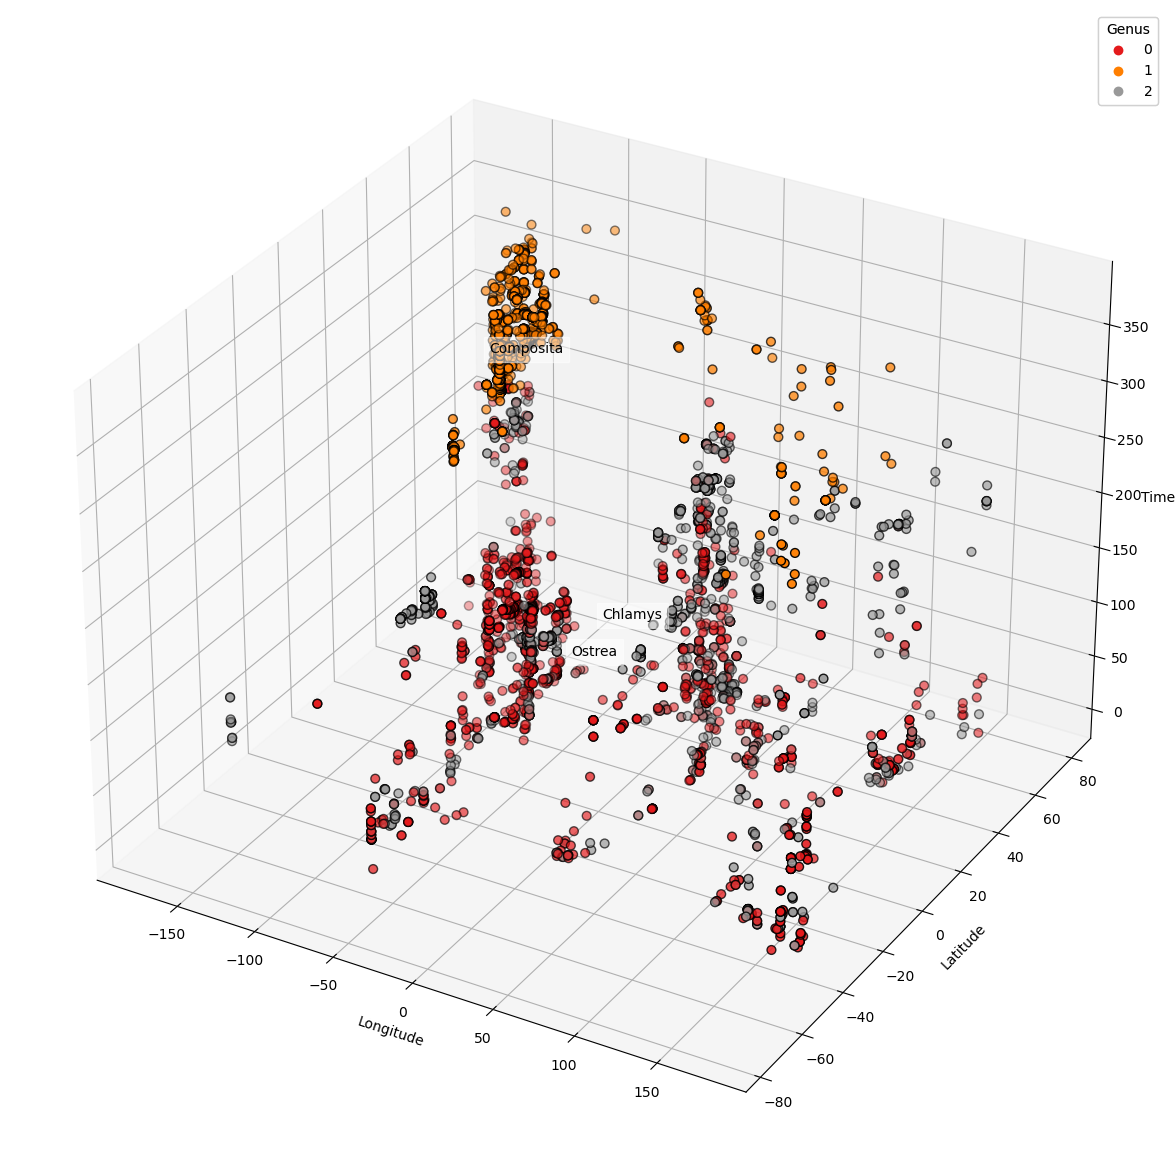

In [91]:
#3D Vizualisation added recently by me --> Oscar :) 

from mpl_toolkits.mplot3d import Axes3D


fig = plt.figure(figsize=(20, 15))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(data3d['lng'], data3d['lat'], data3d['time'], c=data3d['genus'].map({'Ostrea': 0, 'Composita': 1, 'Chlamys': 2}), cmap=plt.cm.Set1, edgecolor='k', s=40)

ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.set_zlabel('Time')

# Create a legend
legend1 = ax.legend(*scatter.legend_elements(), title="Genus")
ax.add_artist(legend1)


for name, label in [('Ostrea', 0), ('Composita', 1), ('Chlamys', 2)]:
    ax.text3D(data3d[data3d['genus'] == name]['lng'].mean(),
              data3d[data3d['genus'] == name]['lat'].mean(),
              data3d[data3d['genus'] == name]['time'].mean(),
              name,
              horizontalalignment='center',
              bbox=dict(alpha=.5, edgecolor='w', facecolor='w'))

plt.show()


#### With 10 genera

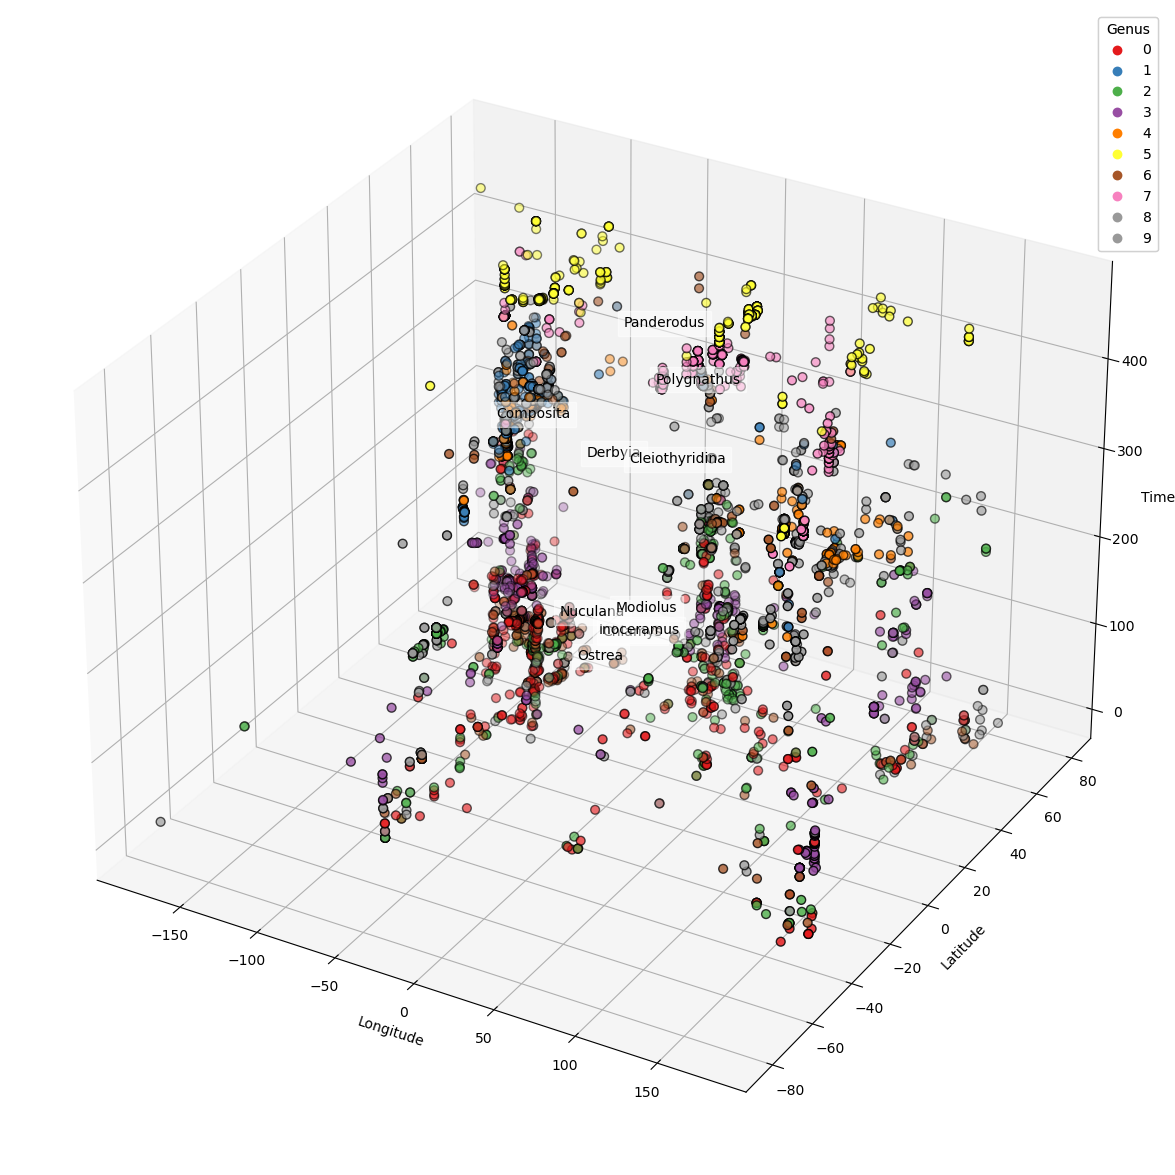

In [92]:
fig = plt.figure(figsize=(20, 15))  # Adjust the size as needed

ax = fig.add_subplot(111, projection='3d')

# Filter data to include only the first 100 occurrences of each genus
filtered_data = pd.concat([data3d[data3d['genus'] == name][:500] for name in ['Ostrea', 'Composita', 'Chlamys', 'Inoceramus', 'Derbyia', 'Panderodus', 'Nuculana', 'Polygnathus', 'Cleiothyridina', 'Modiolus']])

scatter = ax.scatter(filtered_data['lng'], filtered_data['lat'], filtered_data['time'], c=filtered_data['genus'].map({'Ostrea': 0, 'Composita': 1, 'Chlamys': 2, 'Inoceramus':3, 'Derbyia': 4, 'Panderodus': 5, 'Nuculana': 6, 'Polygnathus': 7, 'Cleiothyridina': 8, 'Modiolus': 9}), cmap=plt.cm.Set1, edgecolor='k', s=40)

ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.set_zlabel('Time')

# Create a legend
legend1 = ax.legend(*scatter.legend_elements(), title="Genus")
ax.add_artist(legend1)

genus_names = ['Ostrea', 'Composita', 'Chlamys', 'Inoceramus', 'Derbyia', 'Panderodus', 'Nuculana', 'Polygnathus', 'Cleiothyridina', 'Modiolus']
for name in genus_names:
    ax.text3D(filtered_data[filtered_data['genus'] == name]['lng'].mean(),
              filtered_data[filtered_data['genus'] == name]['lat'].mean(),
              filtered_data[filtered_data['genus'] == name]['time'].mean(),
              name,
              horizontalalignment='center',
              bbox=dict(alpha=.5, edgecolor='w', facecolor='w'))

plt.show()

In [93]:
train3dknn(3)

0.61

### Paleolongitude + Time

In [94]:
# Creating the dataset the exact same way as before
paleodata3d=data.copy
paleodata3d=data[['paleolng', 'paleolat', 'genus']].copy()
paleodata3d['time']=(data['max_ma']+data['min_ma'])/2
paleodata3d = paleodata3d[paleodata3d['genus'].isin(['Ostrea', 'Composita', 'Chlamys','Inoceramus','Derbyia',"Panderodus","Nuculana","Polygnathus","Cleiothyridina","Modiolus"])]
paleodata3d = paleodata3d.sample(frac=1).reset_index(drop=True) # randomize the rows so that there is no bias in the order of the rows
paleodata3d

paleolng  paleolat           genus     time
0         10.61     38.13         Chlamys  193.050
1        -48.10     39.52          Ostrea   57.250
2        -63.59     39.45          Ostrea  106.750
3        -70.78     33.27         Chlamys   31.000
4        -62.78     51.86      Inoceramus   77.850
...         ...       ...             ...      ...
13822    -36.19    -12.74       Composita  316.350
13823     52.04    -38.08  Cleiothyridina  257.035
13824    129.44     38.23      Inoceramus   84.650
13825     44.91     -4.73        Modiolus  164.800
13826    -62.81     51.85          Ostrea   77.850

[13827 rows x 4 columns]

In [95]:
train3dknn(3,neighbors= 8, features=['paleolat','paleolng','time'],data=paleodata3d)

0.55

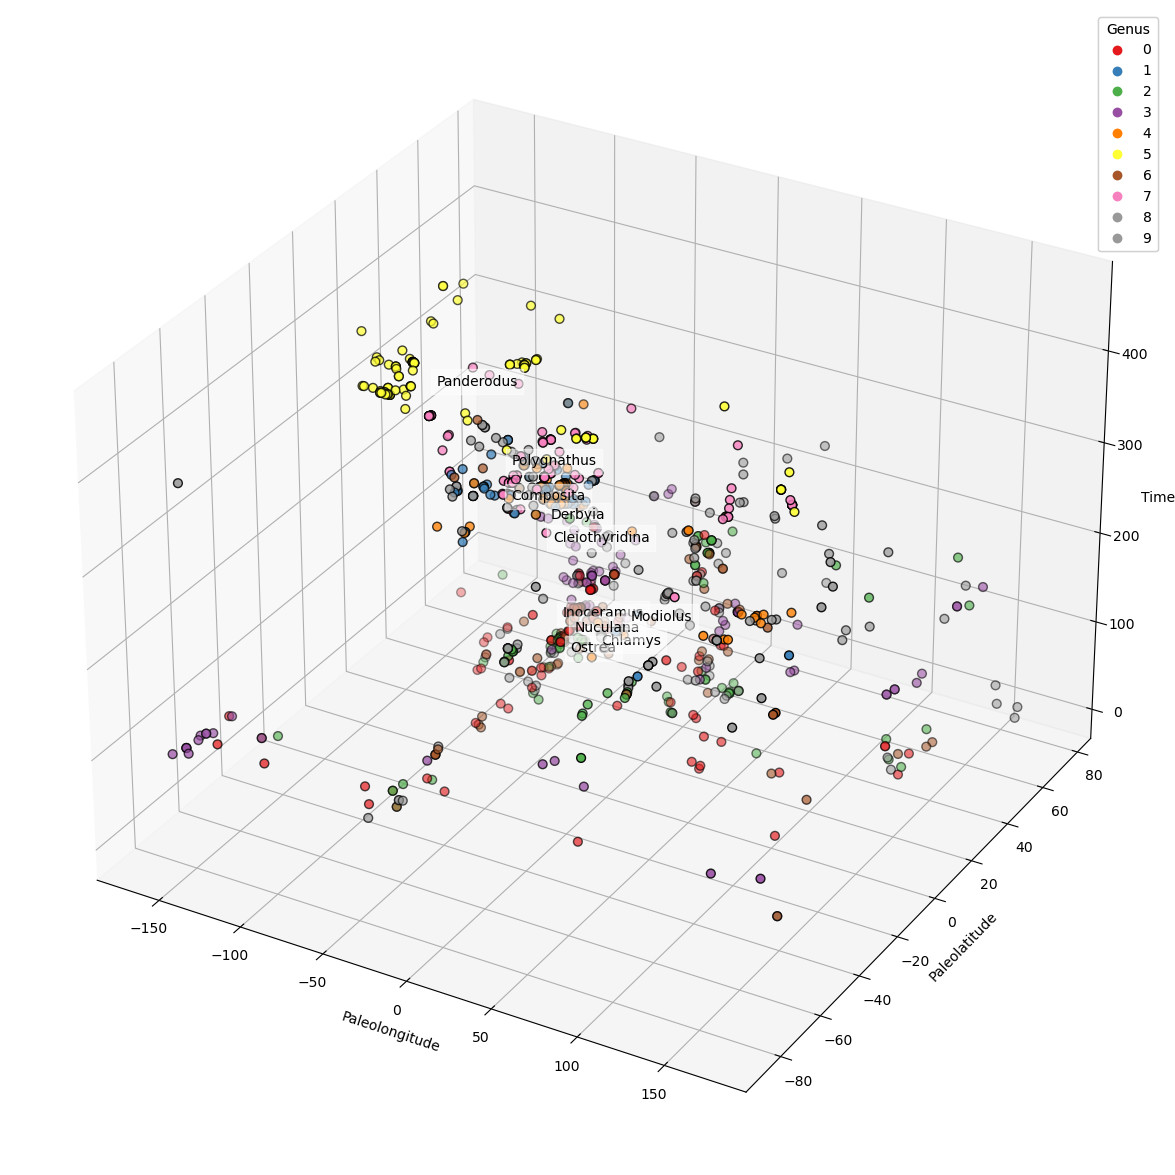

In [96]:
fig = plt.figure(figsize=(20, 15))  # Adjust the size as needed

ax = fig.add_subplot(111, projection='3d')

# Filter data to include only the first 100 occurrences of each genus
filtered_paleodata = pd.concat([paleodata3d[paleodata3d['genus'] == name][:100] for name in ['Ostrea', 'Composita', 'Chlamys', 'Inoceramus', 'Derbyia', 'Panderodus', 'Nuculana', 'Polygnathus', 'Cleiothyridina', 'Modiolus']])

scatter = ax.scatter(filtered_paleodata['paleolng'], filtered_paleodata['paleolat'], filtered_paleodata['time'], c=filtered_paleodata['genus'].map({'Ostrea': 0, 'Composita': 1, 'Chlamys': 2, 'Inoceramus':3, 'Derbyia': 4, 'Panderodus': 5, 'Nuculana': 6, 'Polygnathus': 7, 'Cleiothyridina': 8, 'Modiolus': 9}), cmap=plt.cm.Set1, edgecolor='k', s=40)

ax.set_xlabel('Paleolongitude')
ax.set_ylabel('Paleolatitude')
ax.set_zlabel('Time')

# Create a legend
legend1 = ax.legend(*scatter.legend_elements(), title="Genus")
ax.add_artist(legend1)

genus_names = ['Ostrea', 'Composita', 'Chlamys', 'Inoceramus', 'Derbyia', 'Panderodus', 'Nuculana', 'Polygnathus', 'Cleiothyridina', 'Modiolus']
for name in genus_names:
    ax.text3D(filtered_paleodata[filtered_paleodata['genus'] == name]['paleolng'].mean(),
              filtered_paleodata[filtered_paleodata['genus'] == name]['paleolat'].mean(),
              filtered_paleodata[filtered_paleodata['genus'] == name]['time'].mean(),
              name,
              horizontalalignment='center',
              bbox=dict(alpha=.5, edgecolor='w', facecolor='w'))

plt.show()

In [97]:
data3d

lng        lat           genus     time
0      -37.149723 -10.855556      Inoceramus   91.400
1       23.481388  50.623333     Polygnathus  385.200
2     -116.252502  39.836388     Polygnathus  390.500
3       48.446667  14.316667        Modiolus  164.800
4       14.115278  49.886944      Panderodus  426.500
...           ...        ...             ...      ...
13822   76.133331  39.966667  Cleiothyridina  275.800
13823  -93.708611  31.403055        Nuculana   51.900
13824  142.755829  47.446945          Ostrea   63.850
13825    9.861111  44.847221        Modiolus    3.094
13826 -136.151993  65.880997         Derbyia  292.800

[13827 rows x 4 columns]

---
# 3) Logistic regression <a id='logistic_regression'></a>

#### [Jump back to glossary](#glossary)

---
# 4) Decision tree <a id='decision_tree'></a>

This section of the project is dedicated to creating a decision tree to attempt to classify each fossil based on criterions.

#### [Jump back to glossary](#glossary)

### a) Data processing

### b) Decision tree

### c) Visualization and results

---
# 5) PCA for higher dimensions <a id='pca'></a> 

#### [Jump back to glossary](#glossary)

In [99]:

#necessary imports 
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
from sklearn import decomposition
from sklearn import datasets

from sklearn.decomposition import PCA


## a)  Coordinates + Paleolatitude + Time (2 principal components)

In [108]:
datapca = data[['paleolng', 'paleolat', 'genus', 'lat', 'lng']].copy()
datapca['time']=(data['max_ma']+data['min_ma'])/2
datapca = datapca[datapca['genus'].isin(['Ostrea', 'Composita', 'Chlamys','Inoceramus','Derbyia',"Panderodus","Nuculana","Polygnathus","Cleiothyridina","Modiolus"])]
datapca = datapca.sample(frac=1).reset_index(drop=True)
datapca

paleolng  paleolat       genus        lat         lng     time
0        -88.47    -21.24  Panderodus  49.716667  -64.050003  440.950
1        -79.17     33.68      Ostrea  30.924999  -86.568001   18.205
2        -48.69     38.82      Ostrea  37.788334  -77.394447   57.250
3        -77.71     36.32    Nuculana  32.412224  -90.839165   31.000
4         19.60     37.47     Chlamys  48.000000    8.000000  196.050
...         ...       ...         ...        ...         ...      ...
13822    148.49     53.65  Inoceramus  36.166668  136.750000  160.400
13823    -41.31    -55.39  Inoceramus -63.833332  -58.083332  119.000
13824    -25.61      0.75     Derbyia  39.377777  -95.226387  300.700
13825     36.35    -15.87    Modiolus   9.950000   38.349998  164.800
13826    129.70     34.43     Chlamys  34.883331  132.066666   14.895

[13827 rows x 6 columns]

/var/folders/91/v98ksgyn3zb26xq2gsrl4jzr0000gn/T/ipykernel_50360/476934650.py:22: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('tab10', len(genus_list))


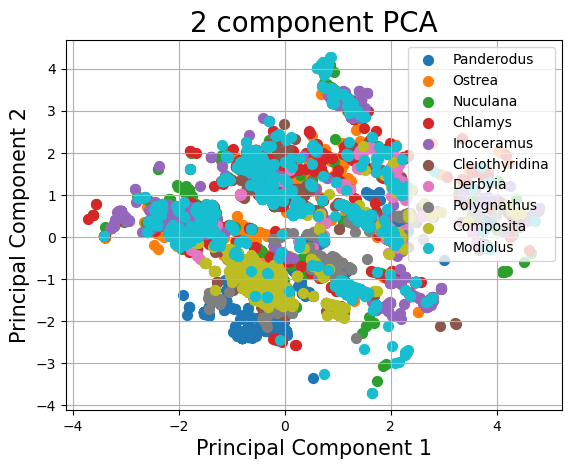

In [109]:
# Features to include in PCA
features = ['paleolng', 'paleolat', 'lat', 'lng', 'time']
# Separating out the features
x = datapca.loc[:, features].values
# Separating out the target
y = datapca.loc[:, ['genus']].values
# Standardizing the features
x = StandardScaler().fit_transform(x)


pca = PCA(n_components=2)
principal_components = pca.fit_transform(x)
principal_df = pd.DataFrame(data=principal_components, columns=['principal component 1', 'principal component 2'])



final_df = pd.concat([principal_df, datapca[['genus']]], axis=1)


fig, ax = plt.subplots()
genus_list = final_df['genus'].unique()
colors = plt.cm.get_cmap('tab10', len(genus_list))

# Plot each genus
for i, genus in enumerate(genus_list):
    indices_to_keep = final_df['genus'] == genus
    ax.scatter(final_df.loc[indices_to_keep, 'principal component 1']
               , final_df.loc[indices_to_keep, 'principal component 2']
               , c=[colors(i)]
               , s=50)

ax.set_xlabel('Principal Component 1', fontsize=15)
ax.set_ylabel('Principal Component 2', fontsize=15)
ax.set_title('2 component PCA', fontsize=20)
ax.legend(genus_list)
ax.grid()

plt.show()

In [110]:
final_df 

principal component 1  principal component 2       genus
0                  -0.238954              -1.884445  Panderodus
1                  -1.580757               0.376065      Ostrea
2                  -1.430723               0.640986      Ostrea
3                  -1.640159               0.372401    Nuculana
4                  -0.308934               1.111144     Chlamys
...                      ...                    ...         ...
13822               1.299170               3.024256  Inoceramus
13823               1.903916              -1.619460  Inoceramus
13824              -0.415117              -0.748486     Derbyia
13825               1.367408               0.395083    Modiolus
13826               1.201446               3.076555     Chlamys

[13827 rows x 3 columns]

### Now we can apply kNN on this new_dataset with PCA 

In [107]:
accuracypca = knn_classification(final_df, ['principal component 1', 'principal component 2'], 'genus', test_size=0.2, n_neighbors=9)
accuracypca

0.6305133767172812

Better accuracy by 3% then normal kNN. But still not an enormous jump foward